In [2]:
import cv2
import numpy as np
import os

from ultralytics import YOLO

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

In [4]:
retrained = YOLO('/Users/ufuran/Documents/project_work/project_cv_work/yolo_best_of_the_best.pt')

In [6]:
data_folder = 'screw/'
imfiles = os.listdir(os.path.join(data_folder, 'all_image'))
imfiles = [os.path.join(data_folder, 'all_image', f) for f in imfiles if os.path.splitext(f)[-1] == '.jpeg']


0: 640x480 9 screws, 68.6ms
Speed: 3.0ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
{0: 'screw'}

0: 640x480 (no detections), 53.6ms
Speed: 2.5ms preprocess, 53.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
{0: 'screw'}

0: 640x480 1 screw, 58.6ms
Speed: 2.7ms preprocess, 58.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)
{0: 'screw'}

0: 640x480 1 screw, 57.7ms
Speed: 1.9ms preprocess, 57.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
{0: 'screw'}


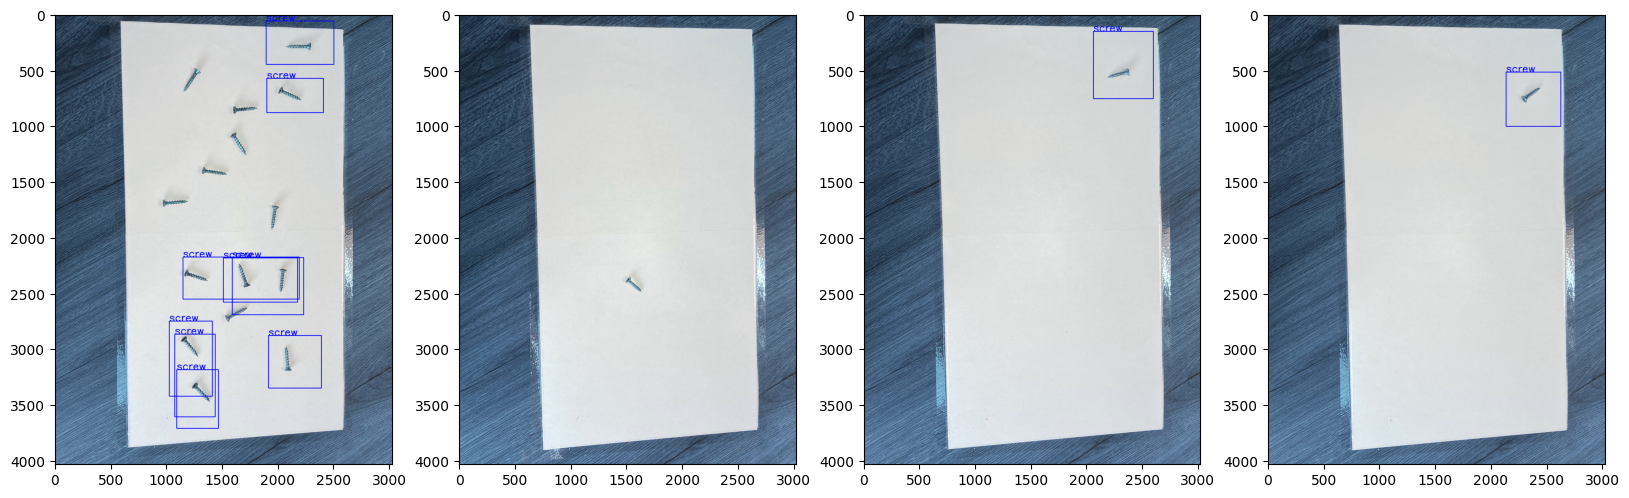

In [11]:
for idx, sample in enumerate(np.random.choice(imfiles, 4)):
    image = cv2.imread(sample)
        
    result = retrained.predict(image, conf=0.2)[0]
    print(result.names)
    boxes = result.boxes.cpu().numpy().xyxy.astype(np.int16)

    for box_idx, box in enumerate(boxes):
        start, stop = box[0:2], box[2:]
        cv2.rectangle(image, start, stop, color=(0, 0, 255), thickness=5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        image = cv2.putText(image, result.names[result.boxes.cls[box_idx].item()], (box[0], box[1]),
                            cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 6, cv2.LINE_AA)

    plt.subplot(1,4,idx+1), plt.imshow(image)